In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sympy import *
import sympy as sp

### 선형회귀에 대한 기초

예를 들어 어떤 함수에 1을 넣으면 6를 반환하고, 2를 넣으면 11을 반환하는 함수가 있다고 해봅시다.

그렇다면 우리는 그 함수의 식이 5x + 1이라고 예상할 수 있습니다.

수식이 그리 복잡하지 않고, 충분히 예상할 수 있는 수들이기 때문입니다.

하지만 예를 들어 30을 넣으면 672를 반환하고 60을 넣으면 8710을 반환하는 함수가 있다라고 했을 때

우리는 이 함수식을 예상할 수 있을까요?? 

뭐.. 계산이야 가능하겠지만 복잡하고 힘든 과정의 연속일 것 입니다. (진짜로 해보진 마세요. 제발. 이해를 돕기위해 막 적은 숫자입니다.)

우리는 이 문제를 회귀를 통해서 해결할 수 있습니다.

| problem |   예측값   |   예시   |
|---------|-------|-------|
|   회귀  |   연속적인 값   |    주식, 부동산 가격   |
|이진분류 |   Yes or No (0,1)   |   상품구매,인터넷 구매전환율(구매/비구매)|
|  다중분류 |   3개 이상의 범주   |   꽃의 구별 ,견종 구별  |

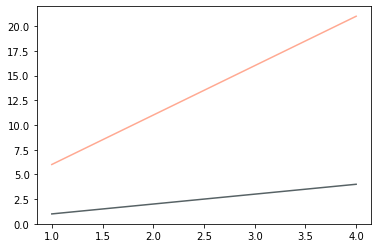

In [3]:
x, y = sp.symbols('x, y')

x = np.arange(1, 5)
func = (5 * x) + 1
func2 = x


plt.plot(x, func, color = '#ffa992')
plt.plot(x, func2, color = '#576265')

### 이 경우 우리는 target값을 알고 있으니 지도 학습에 해당합니다 !

살구색 선은 우리가 도달하고자 하는 목표함수라고 하고, func = (5 * x) + 1

회색 선은 우리가 가정한 가정함수라고 하겠습니다. func2 = x

이 상황에서 우리는 어떻게 회색 선을 파란색 선에 근사하게 할 수 있을까요??

그에 대한 해답으로는 최소제곱법,OLS (Ordinary Least Squares)로 해결할 수 있습니다.

우리가 가정한 함수(회색 선)은 Cost(w,b)라고 정의하겠습니다.

그렇다면 Cost(1,0) 이라고 할 수 있겠습니다.

### 최소제곱법,OLS (Ordinary Least Squares)

최소제곱법이란 잔차의 합의 제곱들을 다 더한 후 잔차의 갯수로 나누는 것을 말합니다.

예를들어 목표함수에 1, 2, 3 을 대입하면 6,11,16 이 나오게됩니다.

그리고 가정함수에 1, 2, 3 을 대입하면 1, 2 ,3 이 나오게됩니다.

그래서 각각의 gene들의 잔차인 5, 9, 13 을 각각을 제곱하여 다 더한 후 갯수로 나누게 되면

25 + 81 + 169 / 3 이 될 것 입니다.

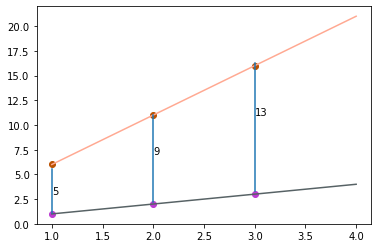

In [4]:
plt.plot(x,func, color = '#ffa992')
plt.plot(x,func2, '#576265')
plt.scatter(x = [1,2,3], y = [6,11,16], color = '#bb5100')
plt.scatter(x = [1,2,3], y = [1,2,3], color = '#bb3cd2')
plt.annotate('5', (1,3))
plt.annotate('9', (2,7))
plt.annotate('13', (3,11))
plt.axvline(x = 1, ymin = 0.05, ymax = 0.25)
plt.axvline(x = 2, ymin = 0.10, ymax = 0.5)
plt.axvline(x =3, ymin = 0.15, ymax = 0.74)

데이터가의 갯수가 많다라고 했을 때 일반식을 만들어보면,

$$ Cost(\omega,\beta) = 1/m \sum_{i=1}^{m} (\omega x_i + \beta - y_i)^2 $$

이렇게 표현할 수 있습니다.

우리의 목표는 잔차의 값을 줄이는 것이기 때문에

$$ \sum_{i=1}^{m} (\omega x_i + \beta - y_i)^2  = m $$ 

위 식의 최솟값(m)을 구해야 합니다.


$$ \omega x_i + \beta $$ 

                                                    위 식은 가정함수이고,

$$ y_i $$ 

                                               위 식은 실제함수의 y값 입니다.

$$ \sum_{i=1}^{m} (\omega x_i + \beta - y_i)^2 $$

위의 2차식을 바탕으로,

X축을 우리가 가정한 함수의 기울기로 두고 y축을 잔차의 제곱으로 둔다면 

기울기가 점점 커질 수록 잔차는 줄어들 것이고,

목표함수의 기울기와 같아진다면 잔차는 최소가 되고,

그 기울기를 지나게되면 다시 잔차는 커지는 그래프를 얻게됩니다.

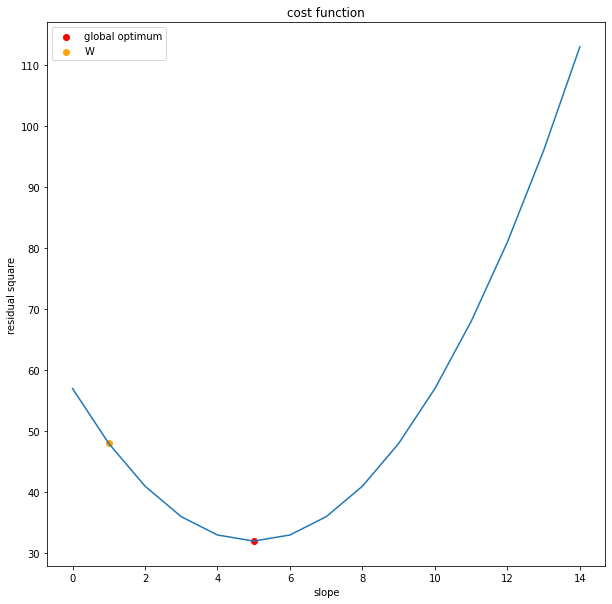

In [38]:
# 예시를 돕기위한 함수입니다.

x2 = np.arange(0,15)
func3 = (x2-5)**2 + 32

plt.figure(figsize = (10,10))
plt.plot(x2, func3)
plt.xlabel('slope')
plt.ylabel('residual square')
plt.scatter(x = 5, y = 32, color = 'red', label = 'global optimum')
plt.scatter(x = 1, y = 48, color = 'orange', label = 'W')
plt.title('cost function')
plt.legend();

현재 우리가 가정한 함수의 기울기는 1이고, 기울기가 5에 도달하면 비용함수에서 최솟값을 가지는 것을 확인할 수 있습니다.

위의 종 모양과 같은 형태를 Convex한 그래프다. 라고도 합니다.

종 모양의 그래프의 경우 반드시 기울기가 0이 되는 지점이 존재함으로 그 점이 최솟값이 될 것이고 최적의 기울기 값이 될 것입니다.

현재 가정한 기울기의 값이 global optimum 보다 작다면, 기울기를 키워야하고,

기울기의 값이 global optimum 보다 크다면, 기울기를 줄여야합니다.

다른 말로 저 2차식을 W에 대해서 편미분한 값이 0보다 작다면 우리는 W를 키워야하고

편미분한 값이 0보다 크다면 우리는 W를 줄여야합니다.

위의 내용을 우리는 경사하강법으로 해결할 수 있습니다.

### 경사하강법

경사하강법이란?  Cost를 줄이기 위해서 반복적으로 기울기와 상수항을 계산하여 값을 변경해나가는 과정입니다.

변경하는 식은 다음과 같습니다.    (#note! 상수항의 경우도 갱신되지 않는다면 잔차가 결국 남아있는 상태가 되기 때문에 최소로 하기 위해서 갱신해줘야 합니다.)


$$ \omega_p = \omega_i*(\partial \ Cost(\omega,\beta)) / (\partial \ \omega) * \alpha $$

$$ \beta_p = \omega_i*(\partial \ Cost(\omega,\beta)) / (\partial \ \beta) * \alpha $$

식에 대해 설명해보면,  

posterior(갱신후 기울기) = prior(갱신 전 기울기) x 기울기에 대해 편미분한 값 x alpha(Learning rate) 입니다.

Learning rate의 역할은 학습의 초반에 만약 기울기가 엄청 크거나 작게 계산된다면 한번에 W의 값이 너무 많이 바뀌어버리기 때문에

그것을 조정하는 역할을 해줍니다.

보통 업데이트는 충분히 많이 하는 편이며, 이를 epoch라 하고, 보통은 1000번 이상을 잡아줍니다.

그래서 정리를 해보면

어떤 data 있을 때 그 데이터를 우리가 새운 가설함수에 input하고, 

그 가설함수에 대한 cost function을 통해 W와 b 값을 위의 식을 통해 갱신하게 되는 것입니다.